In [1]:
import numpy as np
import pandas as pd

from jcopml.automl import AutoRegressor

C:\Users\belly\miniconda3\envs\jcopml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Import Data

In [2]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

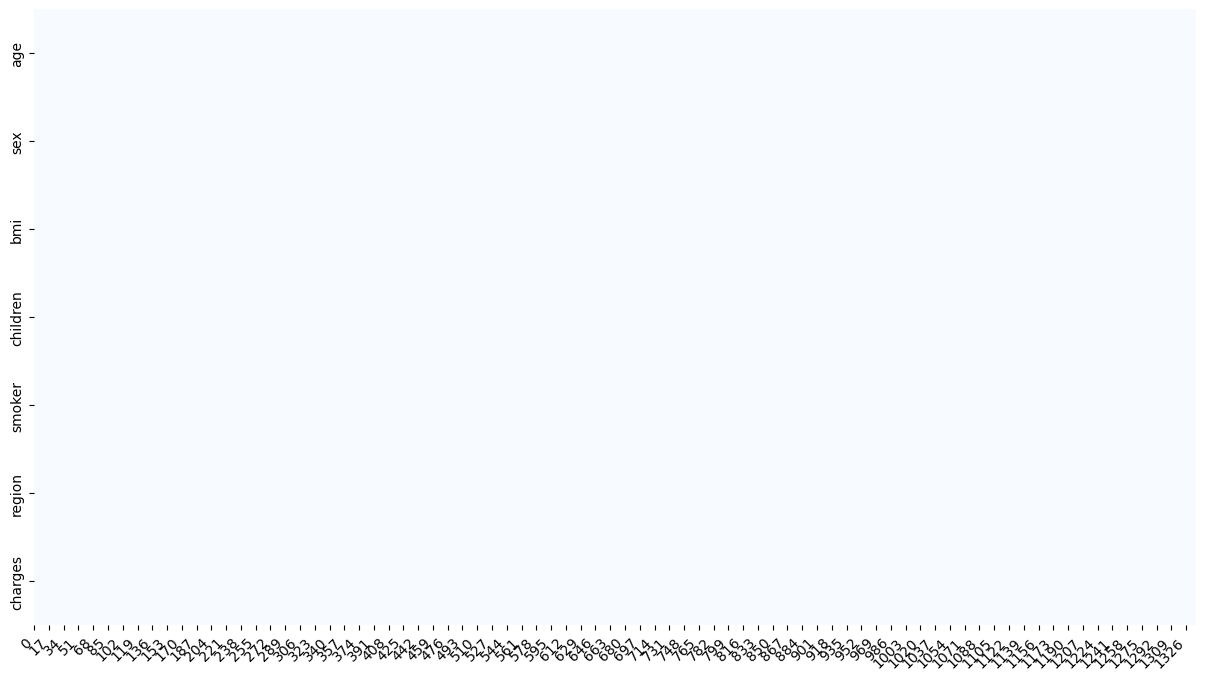

In [3]:
from jcopml.plot import plot_missing_value
plot_missing_value(df)

In [11]:
# No missing values

In [12]:
missing_values_count = df.isnull().sum()
missing_values_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Dataset Splitting

In [4]:
X = df.drop(columns="charges")
y = df.charges
num_feature = ['age', 'bmi', 'children']  # numerical pipeline
cat_feature = ['sex', 'smoker', 'region'] # categorical pipeline

# Training by AutoML

In [5]:
model = AutoRegressor(num_feature, cat_feature, random_state=42 )

In [6]:
model.fit(X, y, cv=3)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
================== Best Model Info ==================
algo                      | RandomForestRegressor
algo__max_depth           | 43
algo__max_features        | 0.8658356038907615
algo__min_samples_leaf    | 17
algo__n_estimators        | 171

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='median')
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.8730023650691511
Valid: 0.8494884391213072
Test : 0.8745647320864491


# View Result

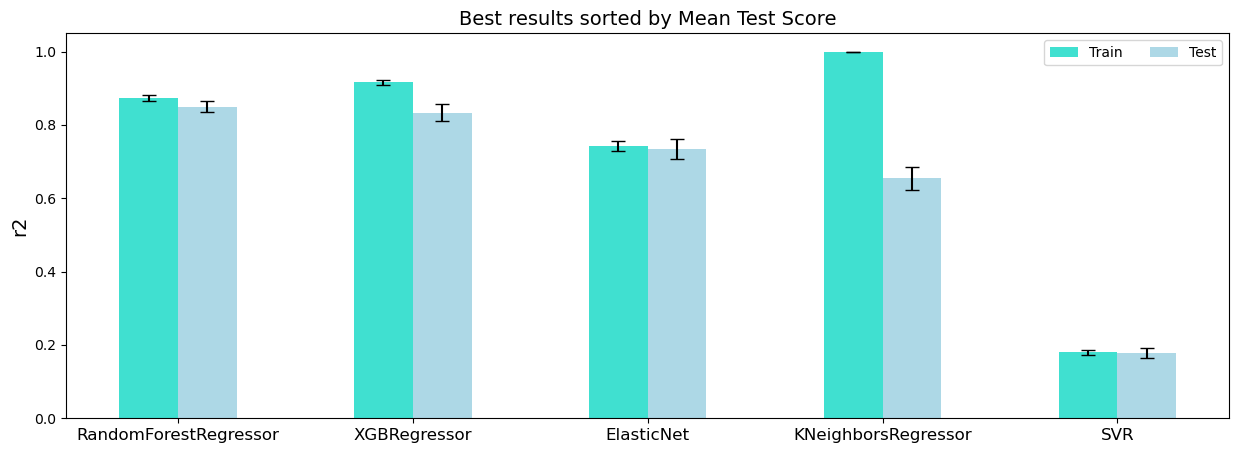

In [7]:
model.plot_results()

# Feature Importance

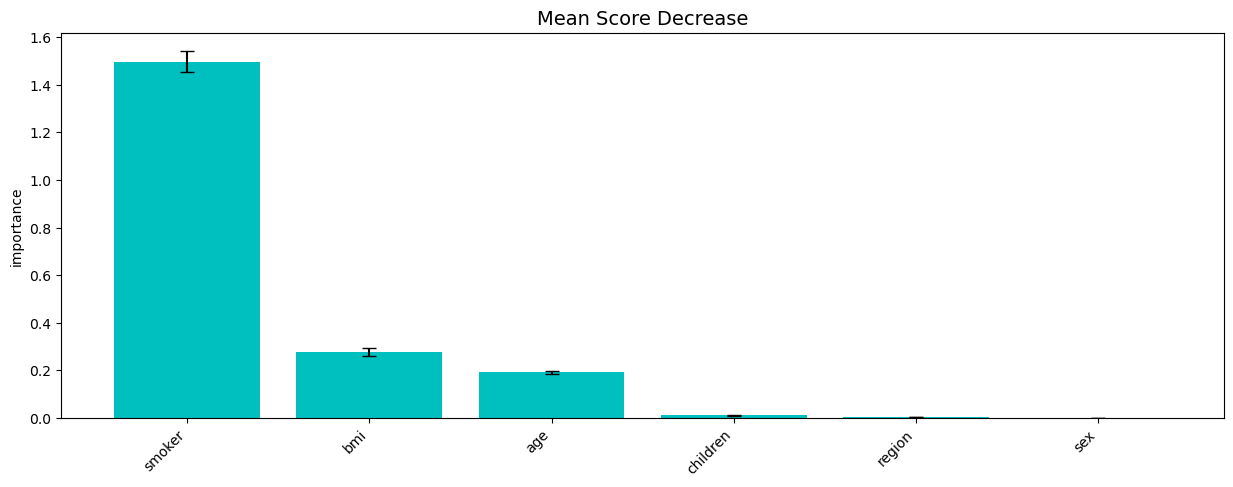

In [8]:
model.mean_score_decrease()

In [ ]:
# smoker, bmi and age are the factors that affecting insurance cost

# Only Random Forest Regressor

In [10]:
model.fit(X, y, algo=['rf'], n_trial=100)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
================== Best Model Info ==================
algo                      | RandomForestRegressor
algo__max_depth           | 65
algo__max_features        | 0.730872218313208
algo__min_samples_leaf    | 10
algo__n_estimators        | 108

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.8859844463297035
Valid: 0.8514706428003679
Test : 0.8796037169980582
